In [1]:
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)
import os
pd.set_option('display.max_colwidth', -1)    # stop the column text truncating... 
pd.set_option("display.max_rows", None, "display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Basic EDA


In [3]:
## 1. Load in the Cleaned Medical Admissions Dataset
admissions = pd.read_csv('../data_output/hospital_admissions_resp_crdv/hospital_admissions_resp_crdv.csv')

admissions['Time period Sortable'] =  pd.to_datetime(
    (admissions['Time period Sortable']/10000).astype(int), 
    format='%Y').dt.year

# Limit the file to the teams definition of Inner and outer CCGs:
inner_ccgs = ['NHS Buckinghamshire CCG', 'NHS Ealing CCG', 'NHS East Berkshire CCG', 'NHS Hillingdon CCG',
 'NHS Hounslow CCG', 'NHS North West Surrey CCG']

outer_ccgs =  ['NHS Basildon And Brentwood CCG', 'NHS Berkshire West CCG', 'NHS Brent CCG', 'NHS Croydon CCG',
               'NHS Guildford and Waverley CCG', 'NHS Hammersmith And Fulham CCG', 'NHS Harrow CCG', 
               'NHS Herts Valleys CCG', 'NHS Kingston CCG', 'NHS Merton CCG', 'NHS Oxfordshire CCG', 
               'NHS Richmond CCG', 'NHS Surrey Heath CCG', 'NHS Sutton CCG', 'NHS Wandsworth CCG']

# restrict to inner/outer CCGs of interest and CCG type 
admissions_ccg = admissions[admissions['Area Name'].isin(inner_ccgs + outer_ccgs)]
admissions_ccg = admissions_ccg[admissions_ccg['Area Type'] == 'CCGs (2019/20)']

# get stroke indicators (they are only available via 2018/19 CCG definition)
strk = admissions.copy()
strk = strk[strk['Indicator Name'].isin(['Stroke admissions (Sentinel Stroke National Audit Programme)', 'Stroke admissions with history of atrial fibrillation not prescribed anticoagulation prior to stroke'])]
strk = strk[(strk['Area Type'] == 'CCGs (2018/19)') & (strk['Area Name'].isin(inner_ccgs + outer_ccgs))]


# concat the stroke & other cardiovascular and respiratory indicators 
admissions_ccg_incstrk = pd.concat([admissions_ccg, strk], axis=0, ignore_index = True)

## EDA: Plot Health Indicators against from time for CCGs

In [5]:
# assign inner/outer label to CCG
admissions_ccg_incstrk['CCG Location'] = np.where(admissions_ccg_incstrk['Area Name'].isin(inner_ccgs) , 'Inner Radius', 
    (np.where(admissions_ccg_incstrk['Area Name'].isin(outer_ccgs), 'Outer Radius', 'Boundary not defined'))
)


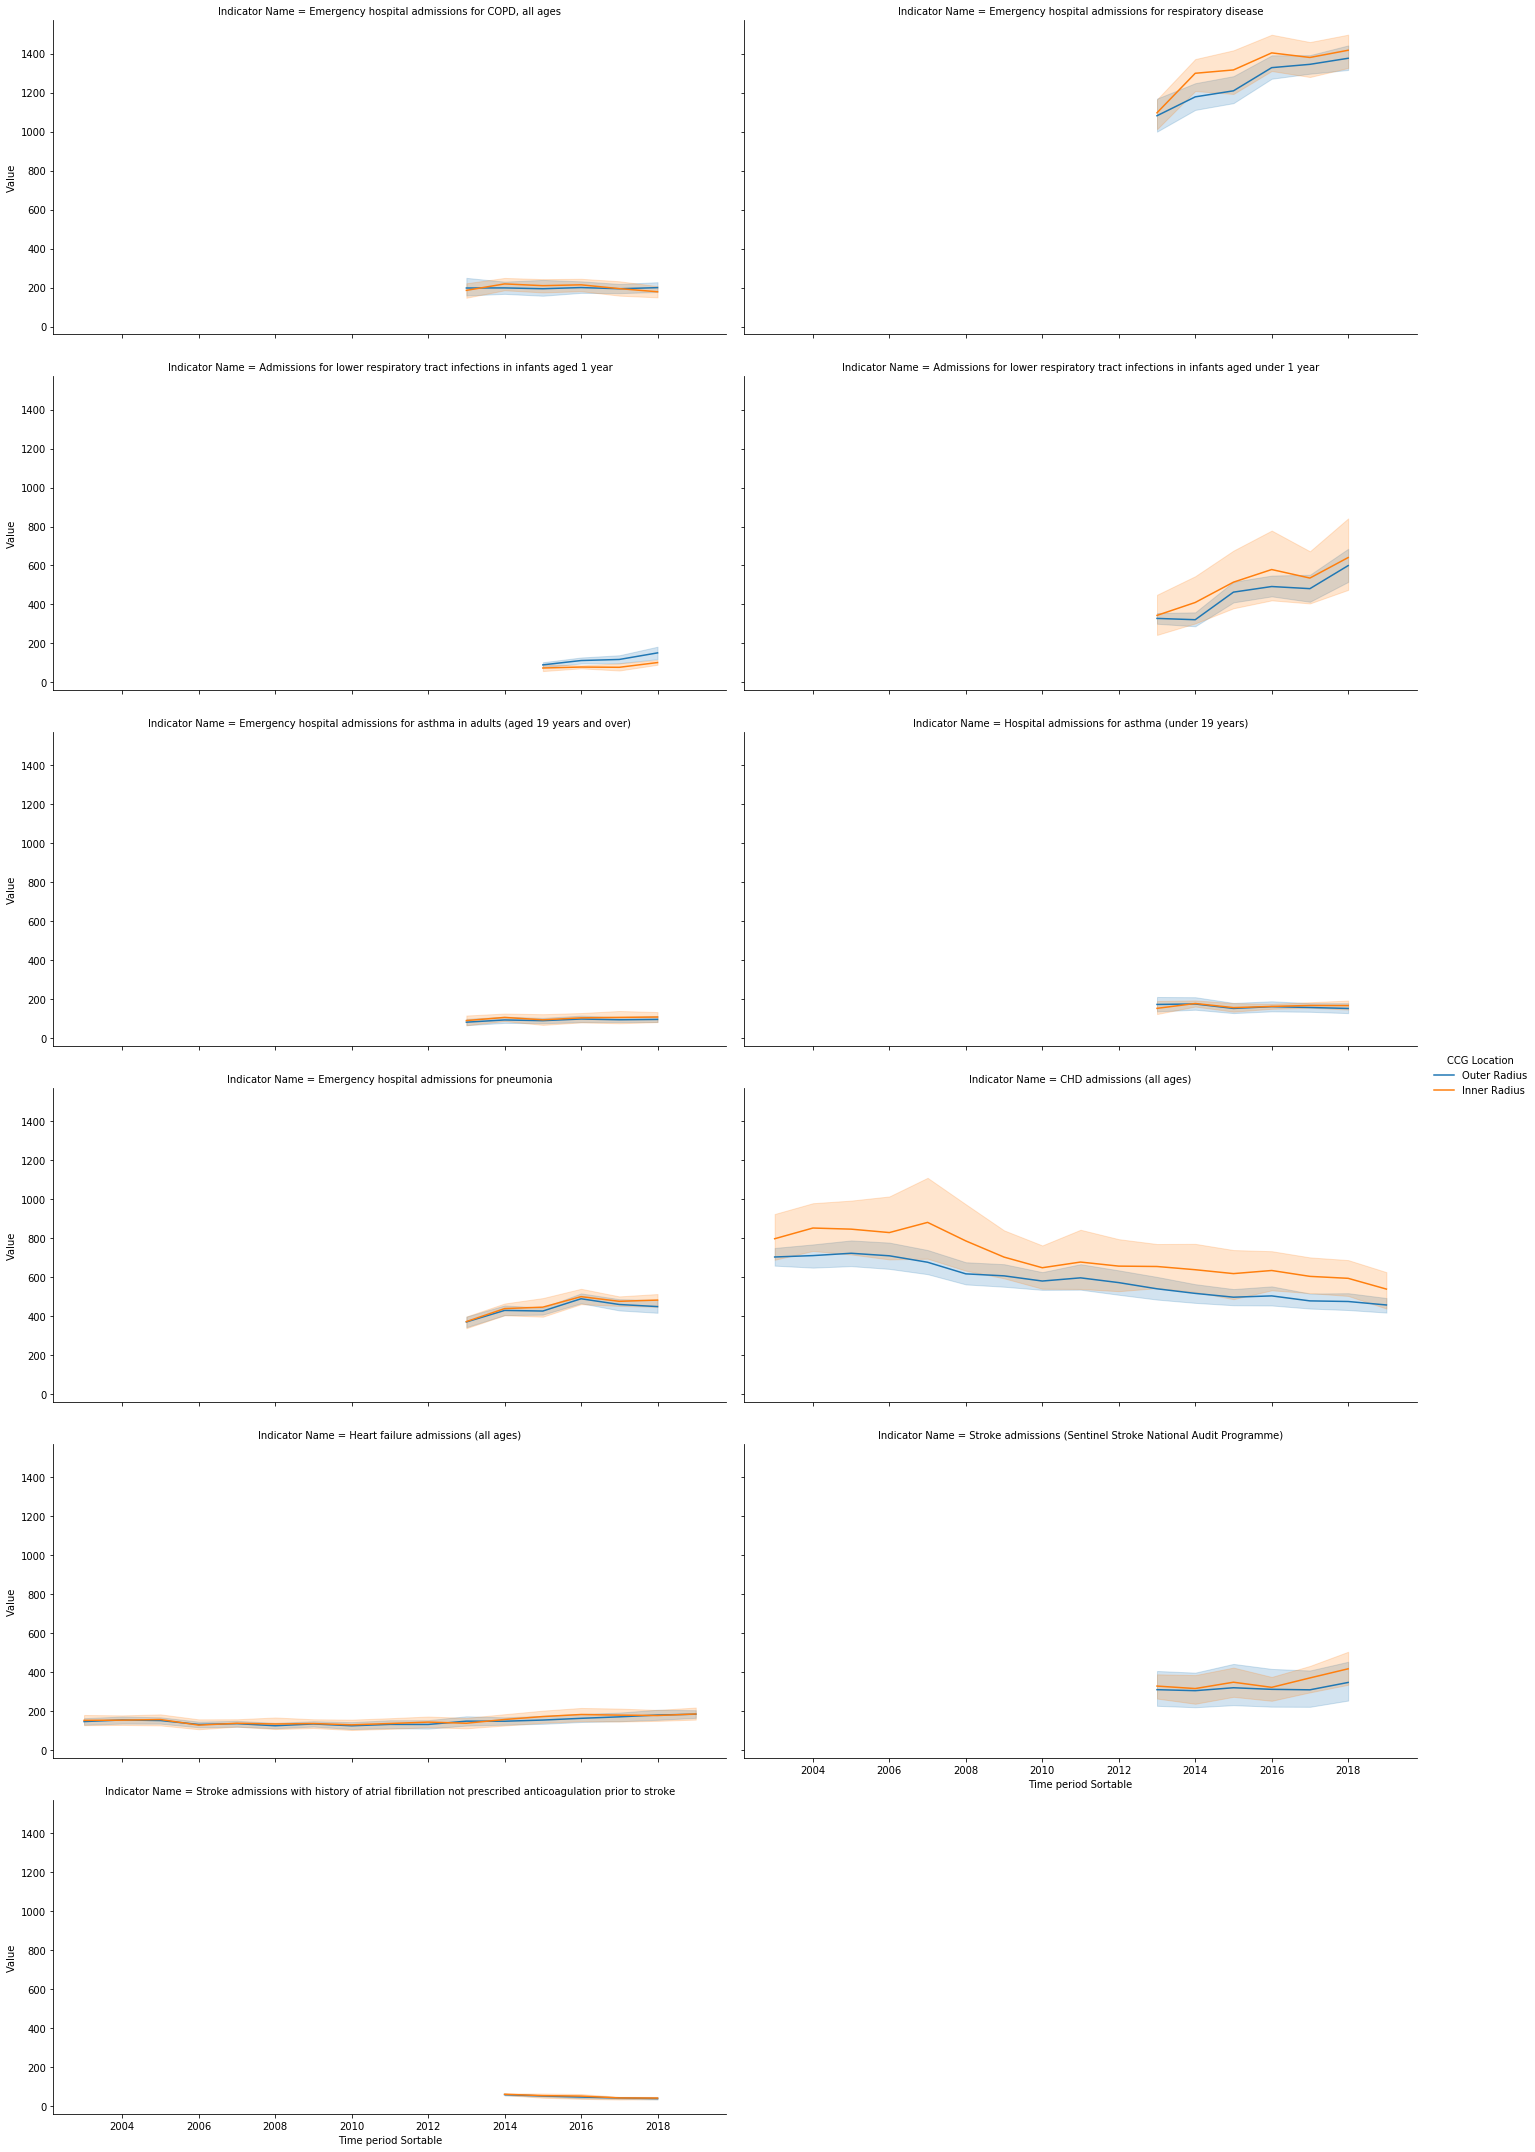

In [7]:
first = admissions_ccg_incstrk[admissions_ccg_incstrk['Sex']== 'Persons'][['Indicator Name', 'Sex', 'Area Name', 'Time period Sortable', 'Value', 'CCG Location']]
g = sns.FacetGrid(first, col='Indicator Name', hue='CCG Location', height=5, aspect=2, col_wrap=2)
g.map(sns.lineplot, 'Time period Sortable', 'Value')
g.add_legend()


# 

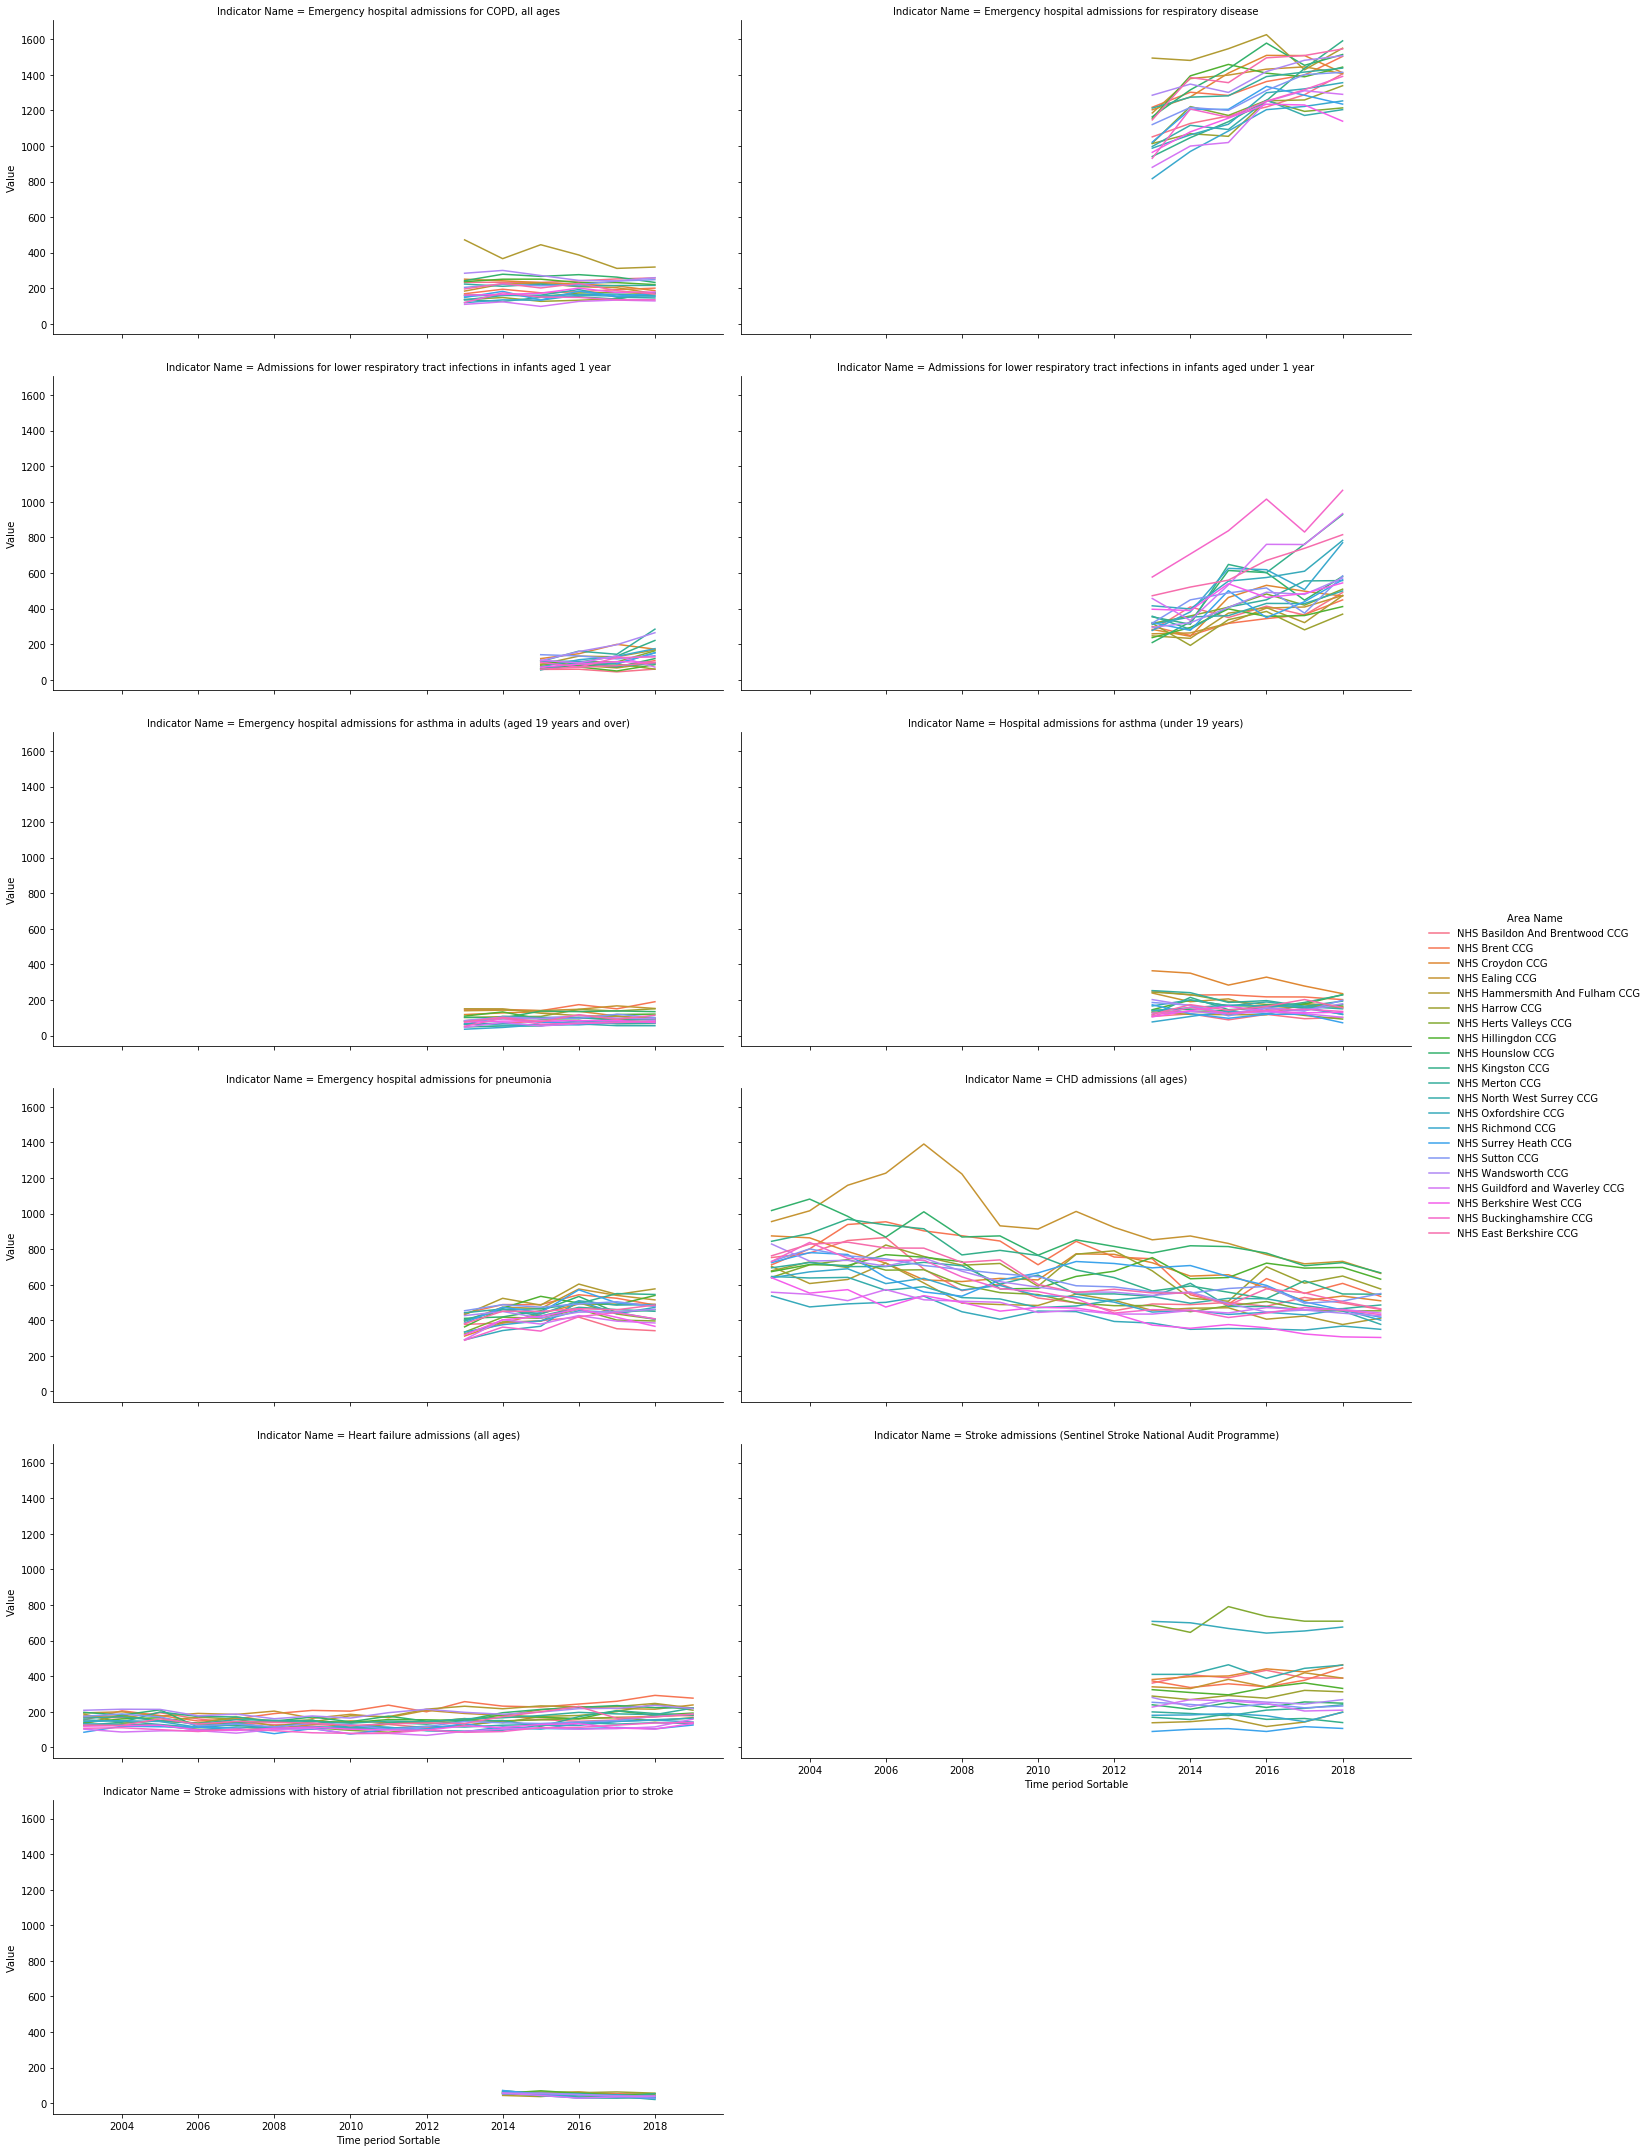

In [8]:
first = admissions_ccg_incstrk[admissions_ccg_incstrk['Sex']== 'Persons'][['Indicator Name', 'Sex', 'Area Name', 'Time period Sortable', 'Value']]
g = sns.FacetGrid(first, col='Indicator Name', hue='Area Name', height=5, aspect=2, col_wrap=2)
g.map(sns.lineplot, 'Time period Sortable', 'Value')
g.add_legend()
